In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Path where the data is located
paths = {'hugo_path' : "C:/Users/jaulab/Desktop/AAD/Data/Hugo_2022/hugo_preproc_data",
        'fulsang_path' : 'C:/Users/jaulab/Desktop/AAD/Data/Fulsang_2017/DATA_preproc',
        'jaulab_path' : 'C:/users/jaulab/Desktop/AAD/Data/Jaulab_2024/PreprocData_ICA',
        'fulsang_filt_path' : 'C:/Users/jaulab/Desktop/AAD/Data/Fulsang_2017/DATA_filtered',
        'jaulab_filt_path' : 'C:/users/jaulab/Desktop/AAD/Data/Jaulab_2024/DATA_filtered'
}

In [10]:
# allows importing function from utils in the parent directory
import os
import sys
parent_dir = 'C:/users/jaulab/Desktop/AAD/deepdecoding'
sys.path.append(parent_dir)
from utils.functional import get_Dataset

In [19]:
subjects = ['S10','S11']
fulsang_train_set, fulsang_val_set = get_Dataset('fulsang', paths['fulsang_path'], subjects, True, norm_stim=True, filt=True, filt_path=paths['fulsang_filt_path'])
jaulab_train_set, jaulab_val_set = get_Dataset('jaulab', paths['jaulab_path'], subjects, True, norm_stim=True, filt=True, filt_path=paths['jaulab_filt_path'])
hugo_train_set, hugo_val_set = get_Dataset('hugo', paths['hugo_path'], subjects, train=True)

In [22]:
print(f'Training sets: {fulsang_train_set.eeg.shape, jaulab_train_set.eeg.shape, hugo_train_set.eeg.shape}')
print(f'Val sets: {fulsang_val_set.eeg.shape, jaulab_val_set.eeg.shape, hugo_val_set.eeg.shape}')

Training sets: (torch.Size([64, 268800]), torch.Size([61, 230656]), (63, 370774))
Val sets: (torch.Size([64, 57600]), torch.Size([61, 47488]), (63, 118862))


### EEG

In [22]:
hugo_train_set.eeg.shape, fulsang_train_set.eeg.shape

((63, 185387), torch.Size([64, 134400]))

In [23]:
# Compruebo las medias 
torch.mean(jaulab_train_set.eeg).item(), torch.mean(fulsang_train_set.eeg).item(), np.mean(hugo_train_set.eeg)

(3.0704299365554446e-19, -9.32620383037055e-19, 5.0386916407419196e-05)

In [24]:
# Compruebo la std
torch.std(jaulab_train_set.eeg).item(), torch.std(fulsang_train_set.eeg).item(), np.std(hugo_train_set.eeg)

(0.9997052162617465, 0.9998437959106949, 0.7316457419620753)

In [25]:
from scipy.signal import firwin, lfilter, filtfilt

def lp_hamming_fir(signal, fs = 64, cutoff_freq = 8, num_taps=1651):
    # Filter design LP FIR type 1 hamming window
    coef = firwin(num_taps, cutoff_freq / (0.5 * fs), window='hamming', pass_zero='lowpass')
    filtered_signal = filtfilt(coef, [1.0], signal)
    return filtered_signal

def hp_hamming_fir(signal, fs = 64, cutoff_freq = 0.5, num_taps=825):
    
    # Filter design HP FIR type 1 hamming window
    coef = firwin(num_taps, cutoff_freq / (0.5 * fs), window='hamming', pass_zero='highpass')
    filtered_signal = filtfilt(coef, [1.0], signal)
    return filtered_signal

torch.Size([64, 134400])


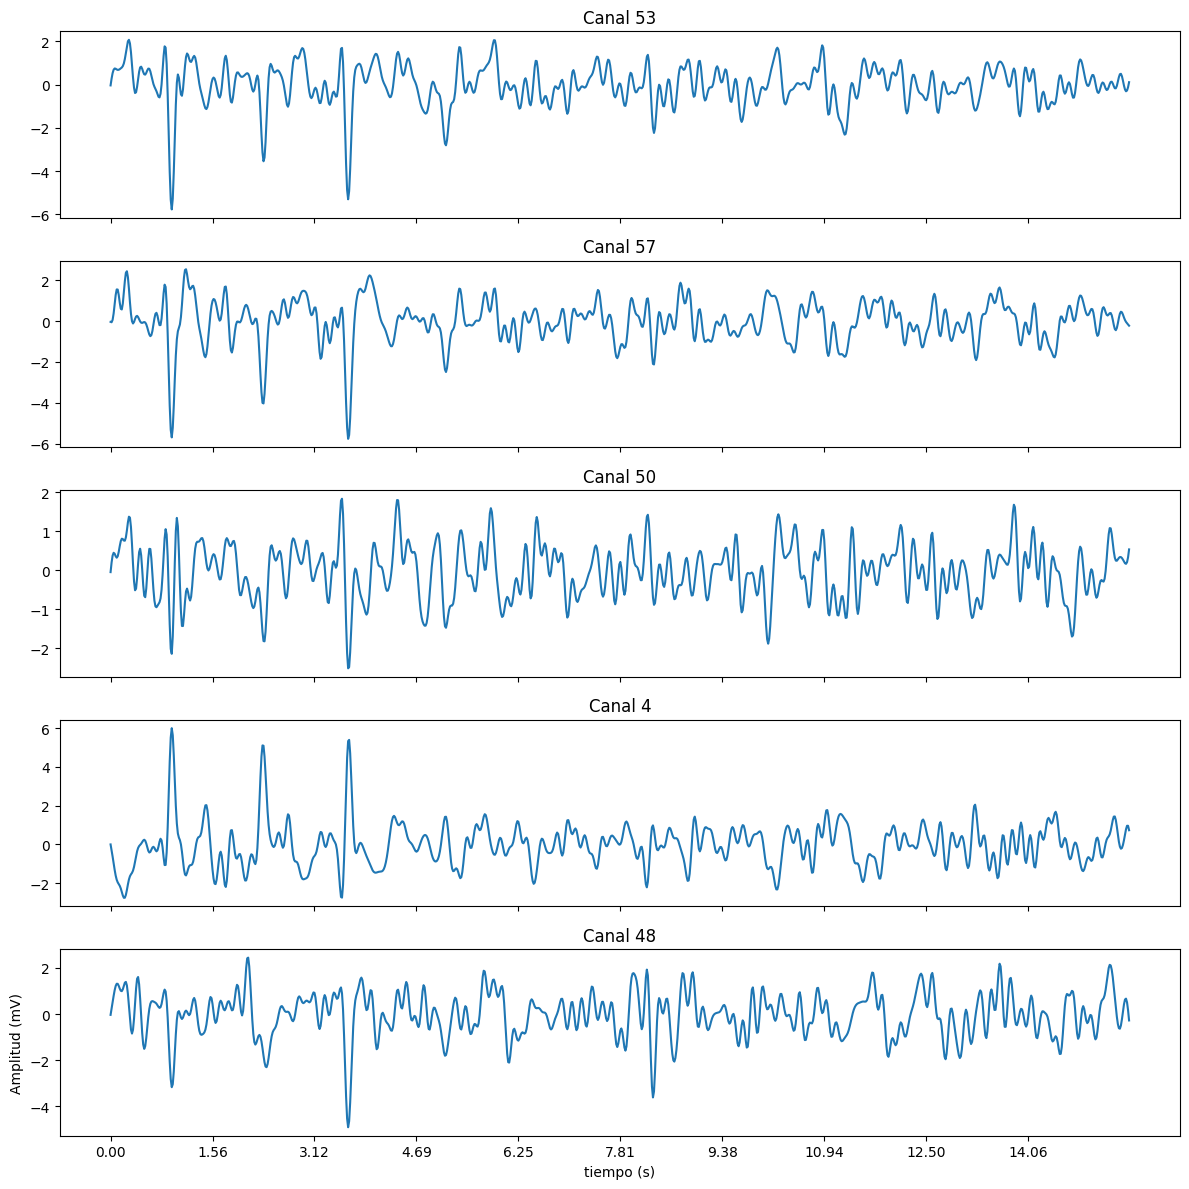

In [28]:
def represent_eeg(dataset: str, samples = 1000, n_channels = 1):

    if dataset == 'jaulab':
        eeg_data = jaulab_train_set.eeg
    elif dataset == 'fulsang':
        eeg_data = fulsang_train_set.eeg
    else:
        eeg_data = hugo_train_set.eeg

    f_sample = 128 if dataset == 'hugo' else 64

    t = np.arange(samples) / f_sample
    print(eeg_data.shape)
    # Filtrado de la señal
    # eeg_data = lp_hamming_fir(eeg_data)
    # eeg_data = hp_hamming_fir(eeg_data)
    eeg = eeg_data[:, :samples]

    fig, axs =  plt.subplots(n_channels, 1, figsize=(12,12), sharex=True)

    channels = np.random.choice(range(1, eeg_data.shape[0]), size=5, replace=False)

    for n, chan in enumerate(channels):
        axs[n].plot(t, eeg[chan,:])
        axs[n].set_title('Canal '+str(chan))
        axs[n].set_xticks(t[::100])
        
    plt.xlabel('tiempo (s)')
    plt.ylabel('Amplitud (mV)')
    plt.tight_layout()
    plt.show

represent_eeg('fulsang', 1000, n_channels = 5)

### ESTÍMULO

In [4]:
# Compruebo las medias 
torch.mean(jaulab_train_set.stima).item(), torch.mean(fulsang_train_set.stima).item(), np.mean(hugo_train_set.stim)

(-2.168693144661793e-17, 2.7068294695622864e-17, -1.3108018125863964e-17)

In [5]:
# Compruebo las std 
torch.std(jaulab_train_set.stima).item(), torch.std(fulsang_train_set.stima).item(), np.std(hugo_train_set.stim)

(0.9999999999999977, 1.0000000000000013, 1.0)

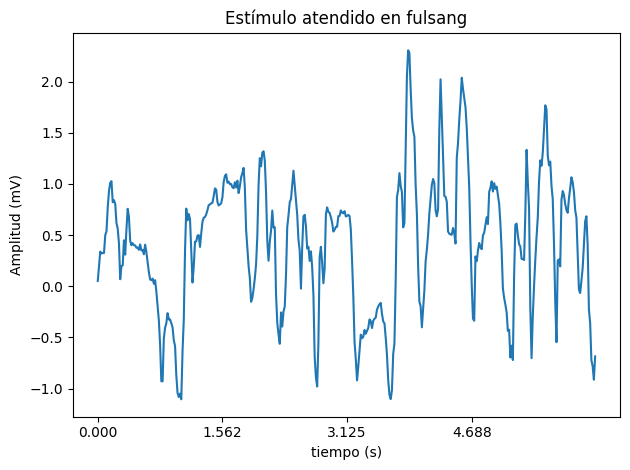

In [11]:
def represent_stim(dataset: str, samples = 1000):

    if dataset == 'jaulab':
        stim_data = jaulab_train_set.stima
    elif dataset == 'fulsang':
        stim_data = fulsang_train_set.stima
    else:
        stim_data = hugo_train_set.stim

    f_sample = 128 if dataset == 'hugo' else 64

    t = np.arange(samples) / f_sample
    eeg = stim_data[1000:1000+samples]

    plt.plot(t, eeg)
    plt.xticks(t[::100])
    plt.title('Estímulo atendido en '+dataset)
        
    plt.xlabel('tiempo (s)')
    plt.ylabel('Amplitud (mV)')
    plt.tight_layout()
    plt.show

represent_stim('fulsang', samples=400)
    